<a href="https://colab.research.google.com/github/Venkatesh0625/Fuzzy-Logic/blob/main/Fuzzy_Logic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np

In [3]:
class FuzzySet:
  def __init__(self, fuzzyset):
    self.f_set = fuzzyset
  
  def union(self, alt):
    r  = dict()

    for i in self.f_set:
      r[i] = max(self.f_set[i], alt.f_set[i]) if i in alt.f_set else self.f_set
    
    for i in alt.f_set:
      if i not in r: r[i] = alt.f_set[i]

    return FuzzySet(r)
  
  def intersection(self, alt):
    r = dict()
    for i in self.f_set:
      if i in alt.f_set: r[i] = min(self.f_set[i], alt.f_set[i])
    
    return FuzzySet(r)

  def complement(self):
    r = dict()

    for i in self.f_set:
      r[i] = round(1 - self.f_set[i], 2)

    return FuzzySet(r)

  def difference(self, alt):
    return self.intersection(alt.complement())

  def demorganLaw(self, alt):
    print('\nVerifying demorgan law')
    c = self.intersection(alt).complement()
    
    d = self.complement().union(alt.complement())

    print('\n(A ∩ B)\' : ', c)
    print('\A\' U B\' : ', d)

    c = self.union(alt).complement()

    d = self.complement().intersection(alt.complement())

    print('\n(A U B)\' : ', c)
    print('\A\' ∩ B\' : ', d)

  def cartProduct(self, alt):
    s = list()
    x = list(self.f_set.values())
    y = list(alt.f_set.values())

    for i in x:
      s.append([min(i, j) for j in y])

    return np.array(s)
  
  def maxminComposition(self, alt1, alt2):
    a = self.cartProduct(alt1)
    b = self.cartProduct(alt2)
    
    na, nb = len(a), len(b)
    s = np.zeros((na, nb))
    for i in range(na):
      for j in range(len(b[0])):
        s[i][j] = max([min(a[i][k], b[k][j]) for k in range(nb)])
    return np.array(s)

  def __str__(self):
    return str(self.f_set)


In [4]:
a = FuzzySet({1:0.6,2:1,3:0.4,4:0.2})
b = FuzzySet({1:0.2,2:0,3:0.2,4:0.8})
print('A : ', a)
print('B : ', b)

A :  {1: 0.6, 2: 1, 3: 0.4, 4: 0.2}
B :  {1: 0.2, 2: 0, 3: 0.2, 4: 0.8}


In [5]:
print('\n(A U B) : ', a.union(b))
print('\n(A ∩ B) : ', a.intersection(b))
print('\nA\' : ', a.complement())
print('\nB\' : ', b.complement())
print('\n(A - B) : ', a.difference(b))
print('\n(b - A) : ', b.difference(a))
a.demorganLaw(b)


(A U B) :  {1: 0.6, 2: 1, 3: 0.4, 4: 0.8}

(A ∩ B) :  {1: 0.2, 2: 0, 3: 0.2, 4: 0.2}

A' :  {1: 0.4, 2: 0, 3: 0.6, 4: 0.8}

B' :  {1: 0.8, 2: 1, 3: 0.8, 4: 0.2}

(A - B) :  {1: 0.6, 2: 1, 3: 0.4, 4: 0.2}

(b - A) :  {1: 0.2, 2: 0, 3: 0.2, 4: 0.8}

Verifying demorgan law

(A ∩ B)' :  {1: 0.8, 2: 1, 3: 0.8, 4: 0.8}
\A' U B' :  {1: 0.8, 2: 1, 3: 0.8, 4: 0.8}

(A U B)' :  {1: 0.4, 2: 0, 3: 0.6, 4: 0.2}
\A' ∩ B' :  {1: 0.4, 2: 0, 3: 0.6, 4: 0.2}


In [10]:
a = FuzzySet({2:1, 3:0.4, 1:0.6, 4:0.2})
b = FuzzySet({5:0, 7:0.2, 6:0.2, 8:0.8})
c = FuzzySet({2:0.5, 3:0.6, 1:0.1, 4:0.9})
print('A : ',a)
print('B : ',b)
print('C : ',c)

A :  {2: 1, 3: 0.4, 1: 0.6, 4: 0.2}
B :  {5: 0, 7: 0.2, 6: 0.2, 8: 0.8}
C :  {2: 0.5, 3: 0.6, 1: 0.1, 4: 0.9}


In [11]:
R = a.cartProduct(b)
S = a.cartProduct(c)
print('\nR = AxB ---------- \n', R)
print('\nS = AxC ---------- \n', S)
c = a.maxminComposition(b, c)
print('\nRoS --------------')
print(c)


R = AxB ---------- 
 [[0.  0.2 0.2 0.8]
 [0.  0.2 0.2 0.4]
 [0.  0.2 0.2 0.6]
 [0.  0.2 0.2 0.2]]

S = AxC ---------- 
 [[0.5 0.6 0.1 0.9]
 [0.4 0.4 0.1 0.4]
 [0.5 0.6 0.1 0.6]
 [0.2 0.2 0.1 0.2]]

RoS --------------
[[0.2 0.2 0.1 0.2]
 [0.2 0.2 0.1 0.2]
 [0.2 0.2 0.1 0.2]
 [0.2 0.2 0.1 0.2]]


In [14]:
import matplotlib.pyplot as plt

Triangulat function plot


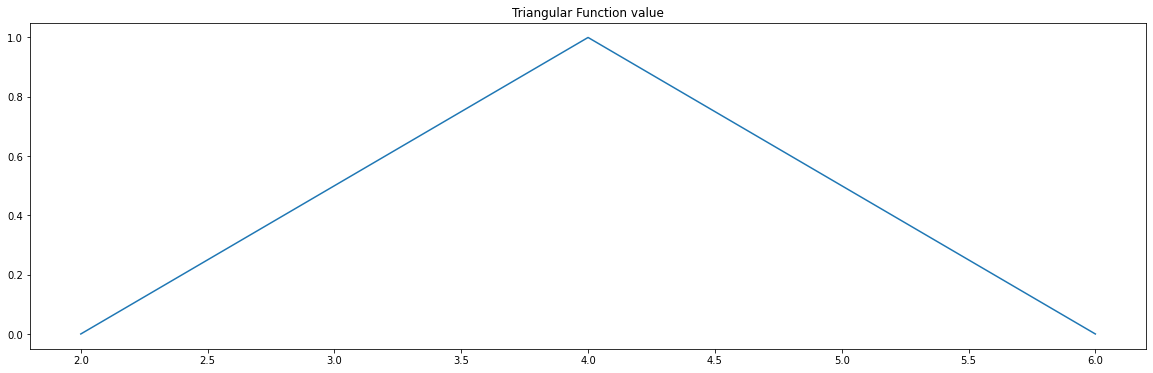

In [15]:
a, b, c, d = 2, 4, 6, 8

plt.figure(figsize = (20, 6))

plt.title('Triangular Function value')
plt.plot([a, b, c], [0, 1, 0])
print("Triangulat function plot")
plt.show()

Trapezoidal function plot


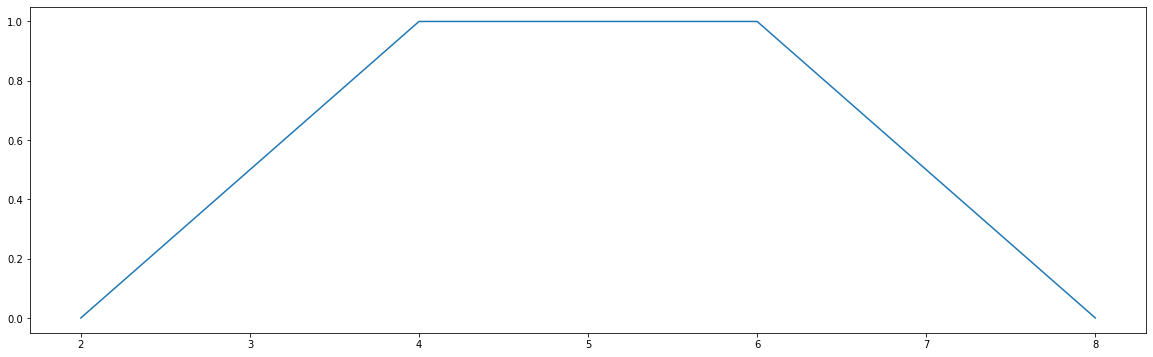

In [16]:
print("Trapezoidal function plot")
plt.figure(figsize = (20, 6))
plt.plot([a, b, c, d], [0, 1, 1, 0])
plt.show()

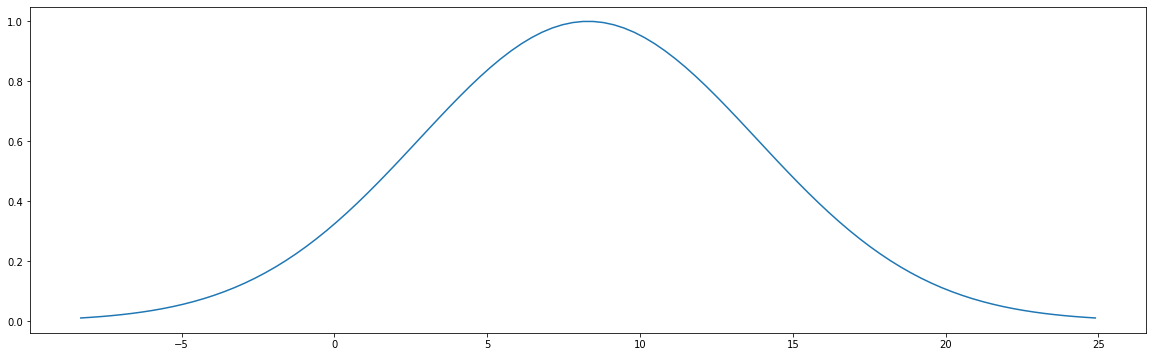

In [17]:
X = np.array([1, 2, 4, 5, 6, 8, 10, 13, 16, 18])

mean = np.mean(X)
std = np.std(X)

x = np.linspace(mean - 3*std, mean + 3*std, 100)
y = [np.exp(-1/2*(abs((i-mean)/std)**2)) for i in x]

plt.figure(figsize = (20, 6))
plt.plot(x, y)
plt.show()

In [46]:
cat = ["NL","NM","NS","ZE","PS","PM","PL"]
ranges = [[0,61], [31,95], [61,127], [95,159], [127,191], [159,223], [191,255]]

x1 = [31,61,95,127,159,191,223]
y1 = [0,1,0,1,0,1,0]
x2 = [0,31,61,95,127,159,191,223,255]
y2 = [1,1,0,1,0,1,0,1,1]

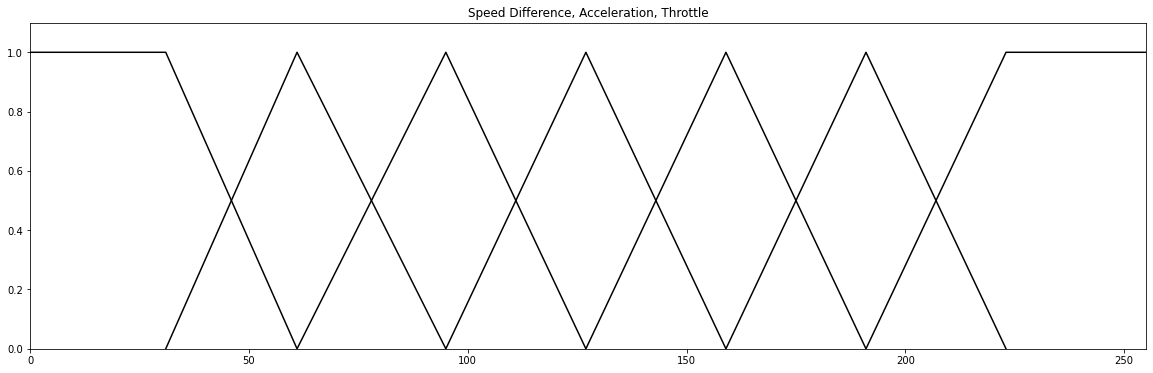

In [47]:
plt.figure(figsize = (20, 6))
plt.plot(x1, y1, 'black')
plt.plot(x2, y2, 'black')
plt.axis([0, 255, 0, 1.1])
plt.title("Speed Difference, Acceleration, Throttle")
plt.show()

In [48]:
def membership_triangle(a, b, c, x):
  m = min((x-a)/(b-a), (c-x)/(c-b))
  return max(m, 0)

def membership_trapezium(a, b, c, d, x):
  m = min((x-a)/(b-a),1,(d-x)/(d-c))
  return max(m, 0)

Speed Dofference range :  ['NS', 0.84375, 'ZE', 0.15625]
Accelaration range :  ['NM', 0.7352941176470589, 'NS', 0.2647058823529412]
Rule 1 :  0 0
Rule 2 :  0.15625 0
Rule 3 :  0 0
Rule 4 :  0.84375 0
Rule 5 :  0 0.2647058823529412
Rule 6 :  0 0
Rule 7 :  0.15625 0.2647058823529412
Rule 8 :  0.15625 0.7352941176470589

R :  [0, 0, 0, 0, 0, 0, 0.15625, 0.15625]

Fuzzy Value MAX(R) :  0.15625
Throttle Control :  ['PS', 'PM'] 




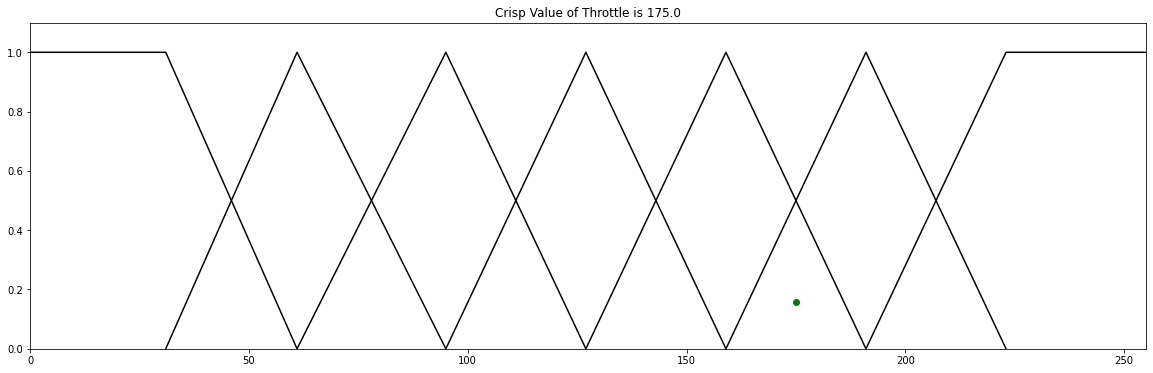

In [51]:
acceleration = 70
speed_difference = 100

val_accl, val_speed, n_cat = [], [], len(cat)

for i in range(n_cat):
  if acceleration > ranges[i][0] and acceleration < ranges[i][1]:
    a, b, c = ranges[i][0], ranges[i-1][1], ranges[i][1]
    x = acceleration

    val_accl.append(cat[i])

    if cat[i] == "NL":
      val_accl.append(membership_trapezium(0, 0, 31, 61, x));
    elif cat == "PL":
      val_accl.append(membership_trapezium(191, 233, 255, 255, x));
    else:
      val_accl.append(membership_triangle(a, b, c, x))

for i in range(n_cat):
  if(speed_difference > ranges[i][0] and speed_difference < ranges[i][1]):
    a, b, c = ranges[i][0], ranges[i-1][1], ranges[i][1]
    x = speed_difference

    val_speed.append(cat[i])
    if cat[i] == "NL":
      val_speed.append(membership_trapezium(0, 0, 31, 61, x));
    elif cat[i] == "PL":
      val_speed.append(membership_trapezium(191, 233, 255, 255, x));
    else:
      val_speed.append(membership_triangle(a, b, c, x))

print('Speed Dofference range : ', val_speed)
print('Accelaration range : ', val_accl)

R = []

speed_rule = ["NL","ZE","NM","NS","PS","PL","ZE","ZE"]
accl_rule = ["ZE","NL","ZE","PS","NS","ZE","NS","NM"]
throttle_rule = ["PL","PL","PM","PS","NS","NL","PS","PM"]

itr = 1
for i, j in zip(accl_rule, speed_rule):
  a = val_speed[val_speed.index(j)+1] if j in val_speed else 0
  b = val_accl[val_accl.index(i)+1] if i in val_accl else 0

  print(f'Rule {itr} : ', a, b)
  R.append(min(a, b))
  itr += 1

print('\nR : ', R)

h = max(R)

throttle = [throttle_rule[i] for i in range(len(R)) if R[i] == h]

#Fuzzy value is max of R as max(R) have good acceleration and speed membership values
print('\nFuzzy Value MAX(R) : ', h)
print('Throttle Control : ', throttle, "\n\n")

idx = [cat.index(i) for i in throttle]

area, centre = [], []
for i in idx:
  tri_area = 1/2 * (ranges[i][1] - ranges[i][0])
  area.append(tri_area)
  centre.append(x1[i])

crisp = sum([i*j for i, j in zip(area, centre)]) / sum(area)

plt.figure(figsize = (20, 6))
plt.plot(x1, y1, 'black')
plt.plot(x2, y2, 'blaCK')
plt.plot(thr, h, "go")
plt.axis([0, 255, 0, 1.1])
plt.title("Crisp Value of Throttle is " + str(crisp))
plt.show()
